In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import numpy as np
import sklearn 
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the data
train_data = pd.read_csv('./data/Train.csv')
test_data = pd.read_csv('./data/Test.csv')


In [3]:
train_data.shape

(8523, 12)

In [4]:
#Handling the missing value
#Creating hash map of item with it's weight 
new_data = train_data[['Item_Identifier','Item_Weight']]
new_data = new_data.drop_duplicates()
new_data = new_data.dropna()

items = new_data['Item_Identifier']
weight = new_data['Item_Weight']
weight_map = dict(zip(items,weight))
new_data.shape

(1555, 2)

In [5]:
#Creating the hash map of outlet size 
outlet = train_data[['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
outlet_details = outlet.drop_duplicates()

outlets = outlet_details['Outlet_Identifier']
outlet_size = outlet_details['Outlet_Size']
outlet_map = dict(zip(outlets,outlet_size))


In [6]:
#Replacing the missing values in item_weight
new_df = train_data['Item_Identifier']
len(new_df)
new_df
new_weight = []
for i in range (len(new_df)):
    try:
        new_weight.append((weight_map[new_df[i]]))
    except:
        new_weight.append(np.NaN)
        pass
len(new_weight)
item_weight = pd.Series(new_weight)
item_weight.shape

(8523,)

In [7]:
#Concating the new weights 
df = pd.concat([train_data,item_weight],axis=1)
# df.head(10)

In [8]:
#Label Encoding the values 
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

cols = df.columns
numeric_col = df._get_numeric_data().columns #Numerical Columns
cat_col = list(set(cols) - set(numeric_col))  #Categorical Columns
#Label Encoding the Categorical values
for item in cat_col:
        df[item]= label_encoder.fit_transform(df[item])

for item in cat_col:
    print(df[item].unique())


[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
[ 156    8  662 ... 1323 1524 1519]
[1 2 3 0 4]
[1 2 0 3]
[9 3 0 1 5 7 2 8 6 4]
[1 3 0 2]
[0 2 1]


In [9]:
df.head()
df.isnull().sum()
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,0
Item_Identifier,1.000000,0.048833,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.000855,0.003656,-0.001178,0.002869,0.048285
Item_Weight,0.048833,1.000000,-0.018929,-0.014048,0.030765,0.027141,-0.007995,-0.011588,-0.015656,0.004715,-0.001088,0.014123,1.000000
Item_Fat_Content,-0.098114,-0.018929,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.004795,-0.004102,-0.004214,0.009800,-0.022147
Item_Visibility,-0.025482,-0.014048,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.087796,-0.028099,-0.173468,-0.128625,-0.009173
Item_Type,-0.017973,0.030765,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,0.000827,0.003084,0.003053,0.017048,0.035700
Item_MRP,0.012853,0.027141,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,-0.002473,0.000232,-0.001975,0.567574,0.025975
Outlet_Identifier,-0.008602,-0.007995,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.053224,-0.716176,0.099873,0.162325,-0.007591
Outlet_Establishment_Year,-0.012772,-0.011588,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.470343,-0.089216,-0.122304,-0.049135,-0.013426
Outlet_Size,0.000855,-0.015656,-0.004795,0.087796,0.000827,-0.002473,0.053224,0.470343,1.000000,-0.290216,-0.432062,-0.172477,-0.014547
Outlet_Location_Type,0.003656,0.004715,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.290216,1.000000,0.467219,0.089367,0.002938


In [38]:
profile = ProfileReport(df)
profile.to_file(output_file="report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#Dropping the Outlet size and item weight 
df.drop(['Item_Weight'],axis=1,inplace = True)

In [11]:
df.drop(['Outlet_Size'],axis=1,inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
print(df.shape)
print(df.isnull().sum())

(8519, 11)
Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
0                            0
dtype: int64


In [14]:
#Creating a Report 
#creating the report of data frame 
profile = ProfileReport(df)
profile.to_file(output_file="report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
df.head(10)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,0
0,156,1,0.016047,4,249.8092,9,1999,0,1,3735.1380,9.300
1,8,2,0.019278,14,48.2692,3,2009,2,2,443.4228,5.920
2,662,1,0.016760,10,141.6180,9,1999,0,1,2097.2700,17.500
3,1121,2,0.000000,6,182.0950,0,1998,2,0,732.3800,19.200
4,1297,1,0.000000,9,53.8614,1,1987,2,1,994.7052,8.930
5,758,2,0.000000,0,51.4008,3,2009,2,2,556.6088,10.395
6,696,2,0.012741,13,57.6588,1,1987,2,1,343.5528,13.650
7,738,1,0.127470,13,107.7622,5,1985,2,3,4022.7636,19.000
8,440,2,0.016687,5,96.9726,7,2002,1,1,1076.5986,16.200
9,990,2,0.094450,5,187.8214,2,2007,1,1,4710.5350,19.200


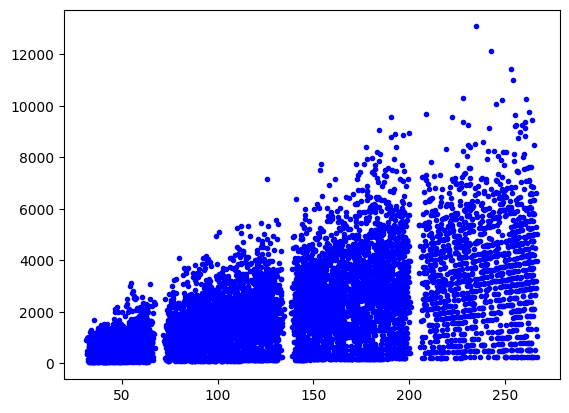

In [16]:
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'], color = 'Blue', marker = '.')
plt.show()

In [18]:
# fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist(df['Item', bins = [0, 25, 50, 75, 100])

ValueError: `bins` must increase monotonically, when an array

In [36]:
X = df.iloc[:,0:9].values
Y = df.iloc[:,9].values

item_weight = df[0]



In [27]:
X = pd.concat([X,item_weight],axis=1)

In [37]:
#Creting the matrix array 
x, y = np.array(X), np.array(Y)

In [29]:
#Creating the model and it's summary
model = LinearRegression().fit(X, Y)

#using the training dataset for the prediction
pred = model.predict(X)

r_sq = model.score(X, Y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

coefficient of determination: 0.5019025507048794
intercept: 6078.300893310337
coefficients: [-1.23448374e-02  3.50851007e+01 -1.72802582e+03 -1.29932991e+00
  1.55708647e+01  5.67088291e+01 -3.61220937e+00 -6.64677515e+01
  8.50046355e+02 -4.22379688e-01]


C:\Users\bhata\proSpace\InternShip\bigmart\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\bhata\proSpace\InternShip\bigmart\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\bhata\proSpace\InternShip\bigmart\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [30]:
print(pred[0:3])
print(Y[0:3])


[4103.96912649 1326.31621939 2400.60091958]
0    3735.1380
1     443.4228
2    2097.2700
Name: Item_Outlet_Sales, dtype: float64


In [31]:
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)#Best fit lineplt.scatter(x, y)
display(r2)
display(mse)

0.5019025507048794

1450379.213004524

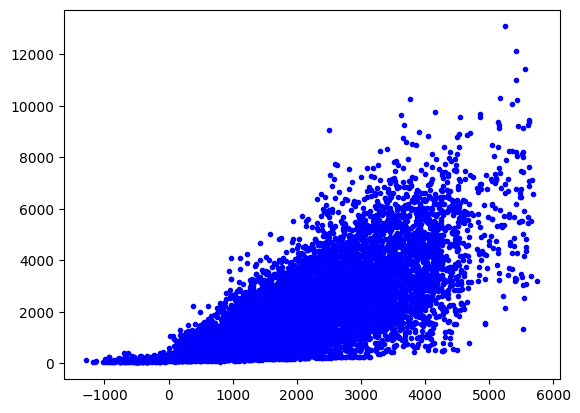

In [32]:
plt.scatter(pred,y, color = 'Blue', marker = '.')
plt.show()

1450379.213004524